# TRAIN MODEL 

In [ ]:
import pandas as pd
import numpy as np
import librosa
import glob

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,Conv2D, Flatten, Dense, MaxPool2D, Dropout, LSTM
from tensorflow.keras.utils import to_categorical
import IPython.display as ipd
from matplotlib import pyplot

In [ ]:
def grab_sound_features(filename):
    sample_rate = 12000
    duration = 3

    # Cargamos el audio
    X, sample_rate = librosa.load(filename, sr=sample_rate, res_type='kaiser_fast')
    n_sample = X.shape[0]
    n_sample_fit = int(duration*sample_rate)

    # Si el audio es muy grande, limitamos la duracion del audio.
    # Si es audio es muy pequeño se completa con ceros.
    # En ambos casos ponemos un silencio de 0.5 segundos
    if n_sample < n_sample_fit:
        X = np.hstack((0.5*sample_rate, X, np.zeros(n_sample_fit - n_sample)))
    elif n_sample > n_sample_fit:
        X = np.hstack((0.5*sample_rate, X[int((n_sample-n_sample_fit)/2):int((n_sample+n_sample_fit)/2)]))
    
    return librosa.feature.melspectrogram(y=X, sr=sample_rate).transpose()

def parser():
    feature = []
    label = []
    # Funcion para cargar archivos y extraer caracteristicas
    #for filename in glob.glob("data/scream/*.wav"):
    for filename in glob.glob("/tmp/out/**/*.wav"):
        mels = grab_sound_features(filename)
        feature.append(mels)
        label.append(1)
    #for filename in glob.glob("data/no-scream/*.wav"):
    for filename in glob.glob("/tmp/UrbanSound8K/audio/**/*.wav"):
        mels = grab_sound_features(filename)
        feature.append(mels)
        label.append(0)
    return [feature, label]

In [ ]:
data = np.array(parser())
n = data.shape[1]

In [ ]:

#Se guarda los datos obtenidos para un uso futuro
from numpy import savez_compressed
savez_compressed('audio_scream_data',data)

In [ ]:
X_ = data[0, :]
Y = data[1, :]
print(X_.shape, Y.shape)
X = np.empty([n, data[0,0].shape[0], data[0,0].shape[1]])

In [ ]:
for i in range(n):
    X[i] = (X_[i])

In [ ]:
Y = np.tile(Y,(data[0,0].shape[0],1)).transpose()
Y = to_categorical(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [ ]:
input_dim = (X_train.shape[1], X_train.shape[2])

In [ ]:
model = Sequential()

model.add(Conv1D(128,kernel_size=3,strides=1, padding="same",activation="tanh",input_shape=input_dim))
model.add(Conv1D(64,kernel_size=3,strides=1, padding="same",activation="tanh"))
model.add(Conv1D(32,kernel_size=3,strides=1, padding="same",activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(units=2, activation="softmax"))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

In [ ]:
# se entrena el modelo en 50 epocas
history = model.fit(X_train, Y_train, epochs = 20, validation_data = (X_test, Y_test))

In [ ]:
# se muestra el accuracy final obtenido
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.xlabel('Epochs', fontsize = 12)
pyplot.ylabel('Loss', fontsize = 12)
pyplot.show()
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.xlabel('Epochs', fontsize = 12)
pyplot.ylabel('Accuracy', fontsize = 12)
pyplot.show()

In [ ]:
# Guardar el Modelo
model.save('scream_cnn.h5')

In [89]:
import numpy as np
import librosa

import IPython.display as ipd
from matplotlib import pyplot
from tensorflow.keras.models import load_model

time: 1.01 ms


In [ ]:
model = load_model('scream_cnn.h5')

In [195]:
def grab_sound_features(filename):
    sample_rate = 12000
    duration = 3

    # Cargamos el audio
#    X, sample_rate = librosa.load(filenameres_type='kaiser_fast')
    X, sample_rate = librosa.load(filename, sr=sample_rate, res_type='kaiser_fast')
    
    return librosa.feature.melspectrogram(y=X, sr=sample_rate).transpose()

def get_scream_prob(filename):
    X = grab_sound_features(filename)
    X2 = X[None,:]
    result = model.predict(X2)
    pyplot.plot(result[0,:,1], 'rs')
    pyplot.xlabel('Time', fontsize = 12)
    pyplot.ylabel('Scream Probability', fontsize = 12)
    pyplot.axis([0, result.shape[1], 0, 1])
    pyplot.show()
    # return ipd.Audio(filename)

time: 12.7 ms


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


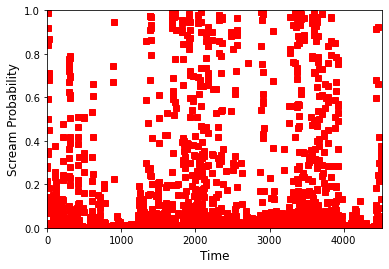

time: 4.74 s


In [196]:
get_scream_prob('/tmp/videoplayback.mp4')

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


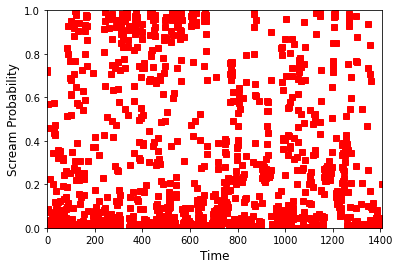

time: 2.85 s


In [95]:
filename = '/app/Speech Emotions/796741862_s7170_d60.mp4'

time: 662 µs


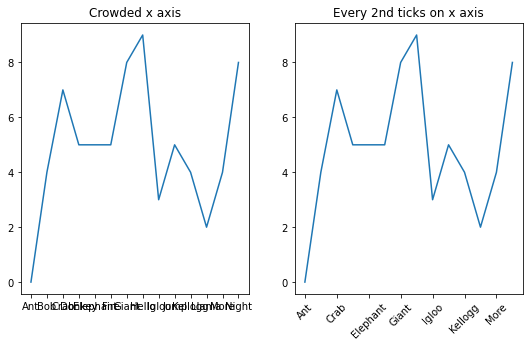

time: 347 ms


In [193]:
x = ["Ant", "Bob", "Crab", "Donkey", "Elephant", "Fire", "Giant","Hello",
     "Igloo", "Jump", "Kellogg","Llama", "More", "Night"]
y = np.random.randint(0,10,14)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5))
ax1.plot(x,y)
ax1.set_title("Crowded x axis")

ax2.plot(x,y)
ax2.set_xticks(x[::2])
ax2.set_xticklabels(x[::2], rotation=45)
ax2.set_title("Every 2nd ticks on x axis")

plt.show()

In [174]:
links = [
    '/app/Speech Emotions/797110392_s14490_d60.mp4',
'/app/Speech Emotions/796741862_s7170_d60.mp4',
'/app/Speech Emotions/796593521_s1350_d60.mp4',
'/app/Speech Emotions/795323567_s33510_d60.mp4',
'/app/Speech Emotions/795323567_s32310_d60.mp4',
'/app/Speech Emotions/794871676_s7440_d60.mp4',
'/app/Speech Emotions/792739531_s19290_d60.mp4',
'/app/Speech Emotions/792764202_s16860_d60.mp4',
'/app/Speech Emotions/790409047_s1440_d60.mp4',
'/app/Speech Emotions/790193120_s2460_d60.mp4',
'/app/Speech Emotions/789763259_s16380_d60.mp4',
'/app/Speech Emotions/786127949_s17400_d60.mp4',
'/app/Speech Emotions/780424731_s34980_d60.mp4',
'/app/Speech Emotions/780347531_s3810_d60.mp4',
'/app/Speech Emotions/774670990_s29910_d60.mp4',
'/app/Speech Emotions/769588654_s24000_d60.mp4',
'/app/Speech Emotions/769286684_s5100_d60.mp4',
'/app/Speech Emotions/763722162_s13290_d60.mp4',
'/app/Speech Emotions/721083276_s6819_d30.mp4',
'/app/Speech Emotions/717096688_s1470_d30.mp4',
'/app/Speech Emotions/716822577_s12074_d30.mp4',
'/app/Speech Emotions/716354179_s6944_d30.mp4',
'/app/Speech Emotions/715297637_s6078_d30.mp4',
]

time: 1.26 ms


[1] /app/Speech Emotions/797110392_s14490_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


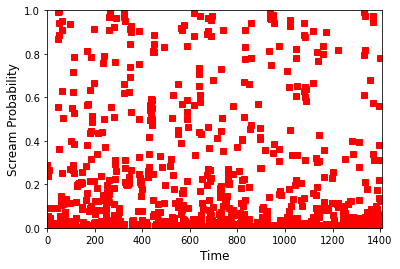

[2] /app/Speech Emotions/796741862_s7170_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


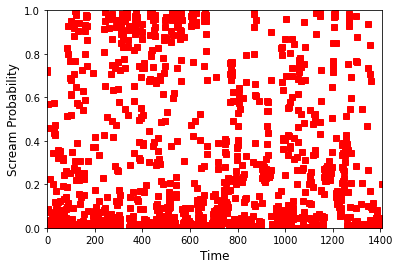

[3] /app/Speech Emotions/796593521_s1350_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


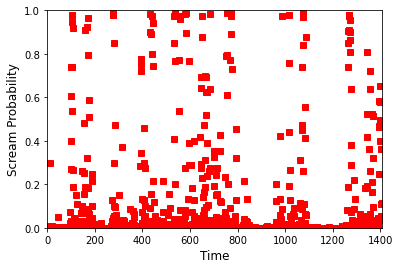

[4] /app/Speech Emotions/795323567_s33510_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


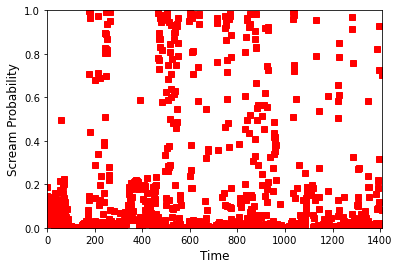

[5] /app/Speech Emotions/795323567_s32310_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


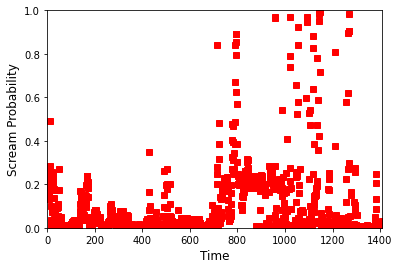

[6] /app/Speech Emotions/794871676_s7440_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


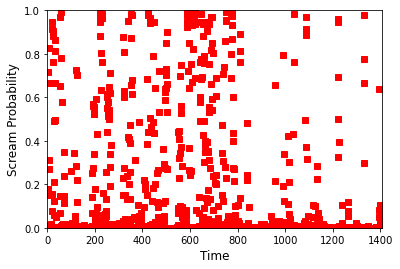

[7] /app/Speech Emotions/792739531_s19290_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


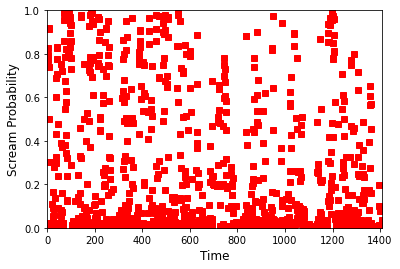

[8] /app/Speech Emotions/792764202_s16860_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


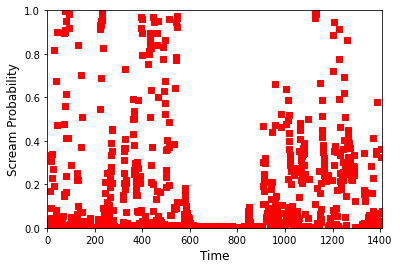

[9] /app/Speech Emotions/790409047_s1440_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


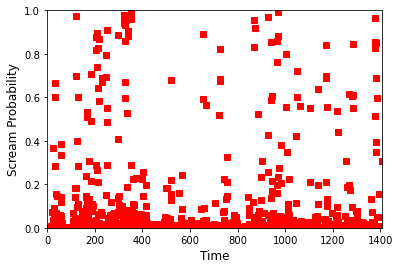

[10] /app/Speech Emotions/790193120_s2460_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


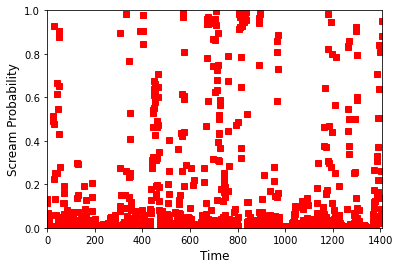

[11] /app/Speech Emotions/789763259_s16380_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


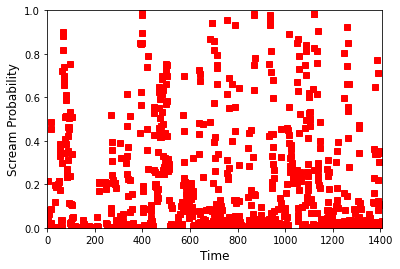

[12] /app/Speech Emotions/786127949_s17400_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


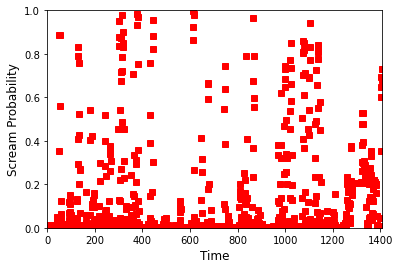

[13] /app/Speech Emotions/780424731_s34980_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


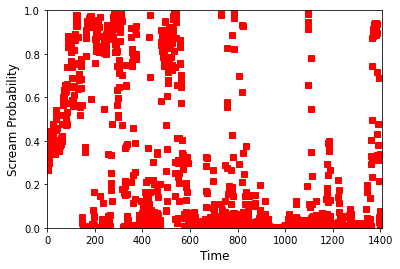

[14] /app/Speech Emotions/780347531_s3810_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


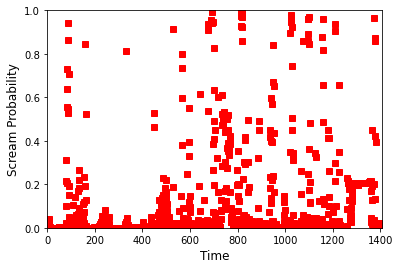

[15] /app/Speech Emotions/774670990_s29910_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


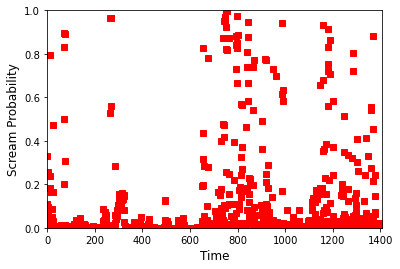

[16] /app/Speech Emotions/769588654_s24000_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


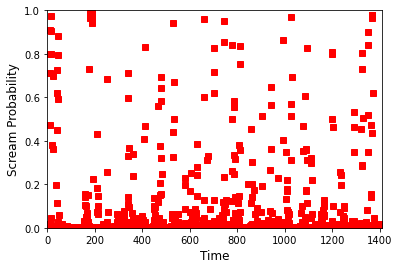

[17] /app/Speech Emotions/769286684_s5100_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


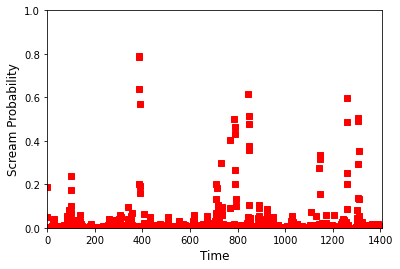

[18] /app/Speech Emotions/763722162_s13290_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


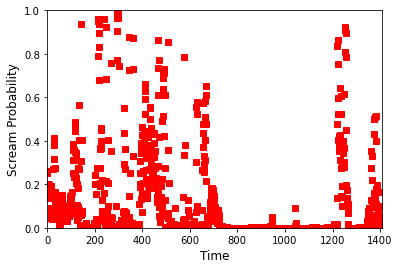

[19] /app/Speech Emotions/721083276_s6819_d30.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


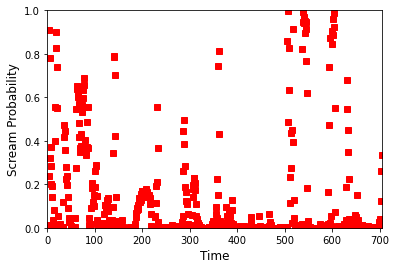

[20] /app/Speech Emotions/717096688_s1470_d30.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


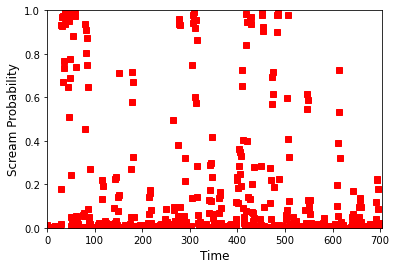

[21] /app/Speech Emotions/716822577_s12074_d30.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


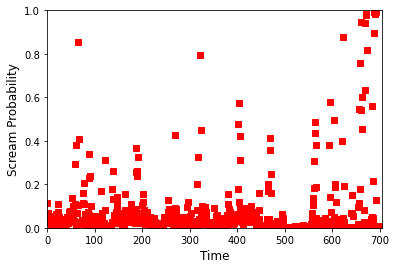

[22] /app/Speech Emotions/716354179_s6944_d30.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


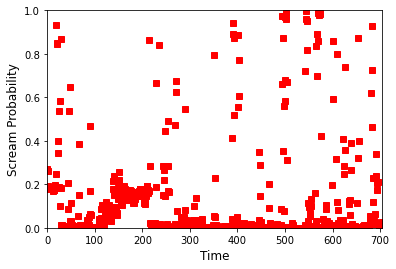

[23] /app/Speech Emotions/715297637_s6078_d30.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


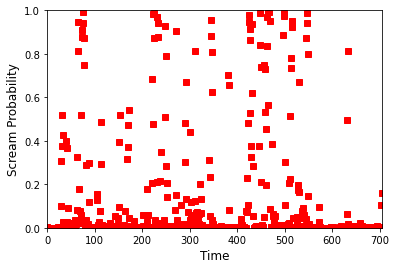

time: 52.9 s


In [175]:
for i, link in enumerate(links, start=1):
    print('[{}] {}'.format(i, link))
    get_scream_prob(link)


## Filter for high probability

In [188]:
def grab_sound_features(filename):
    sample_rate = 12000
    duration = 3

    # Cargamos el audio
#    X, sample_rate = librosa.load(filenameres_type='kaiser_fast')
    X, sample_rate = librosa.load(filename, sr=sample_rate, res_type='kaiser_fast')
    
    return librosa.feature.melspectrogram(y=X, sr=sample_rate).transpose()

def get_scream_prob(filename):
    X = grab_sound_features(filename)
    X2 = X[None,:]
    result = model.predict(X2)
    x = result[0,:,1]
    x = np.array([0 if i < 0.9 else i for i in x])
    pyplot.plot(x, 'rs')
    pyplot.xlabel('Time', fontsize = 12)
    pyplot.ylabel('Scream Probability', fontsize = 12)
    pyplot.axis([0, result.shape[1], 0, 1])
    pyplot.show()

time: 2.67 ms


In [176]:
filename = '/app/Speech Emotions/797110392_s14490_d60.mp4'

time: 1.04 ms


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


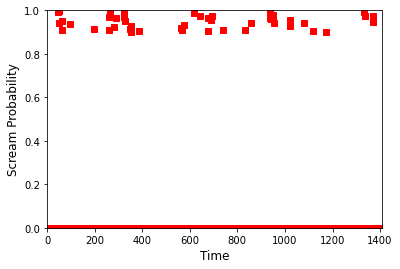

time: 2.32 s


In [189]:
get_scream_prob(filename)

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


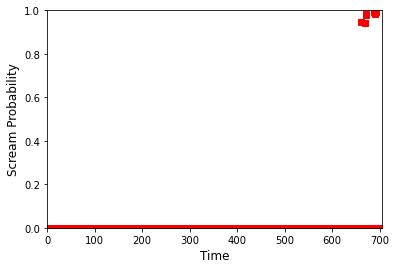

time: 2.3 s


In [190]:
get_scream_prob('/app/Speech Emotions/716822577_s12074_d30.mp4')

[1] /app/Speech Emotions/797110392_s14490_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


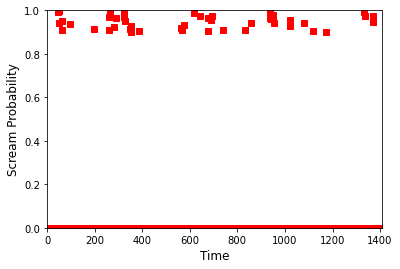

[2] /app/Speech Emotions/796741862_s7170_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


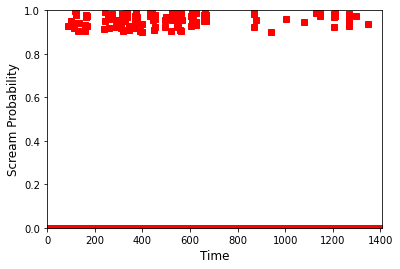

[3] /app/Speech Emotions/796593521_s1350_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


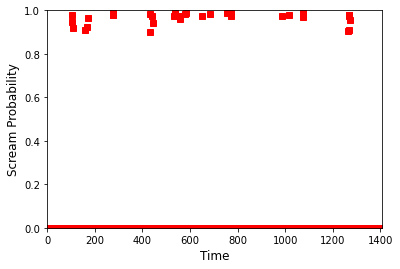

[4] /app/Speech Emotions/795323567_s33510_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


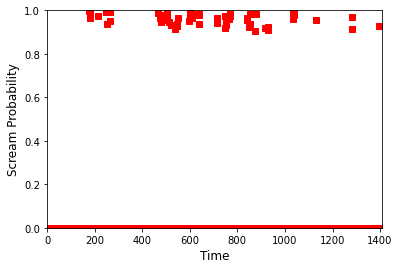

[5] /app/Speech Emotions/795323567_s32310_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


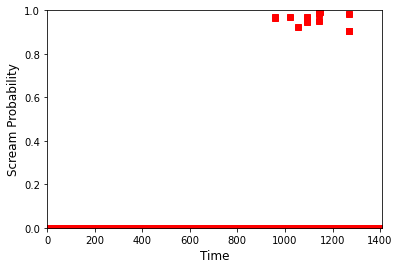

[6] /app/Speech Emotions/794871676_s7440_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


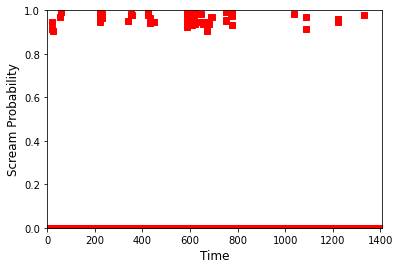

[7] /app/Speech Emotions/792739531_s19290_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


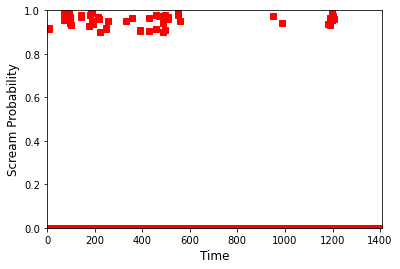

[8] /app/Speech Emotions/792764202_s16860_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


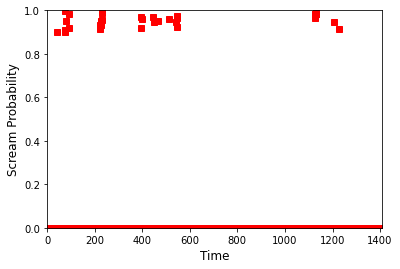

[9] /app/Speech Emotions/790409047_s1440_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


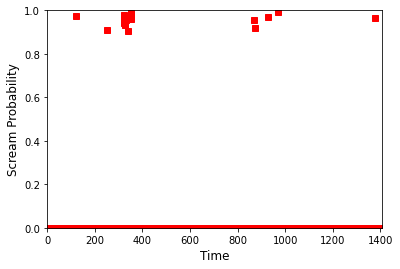

[10] /app/Speech Emotions/790193120_s2460_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


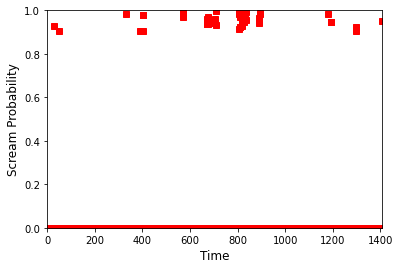

[11] /app/Speech Emotions/789763259_s16380_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


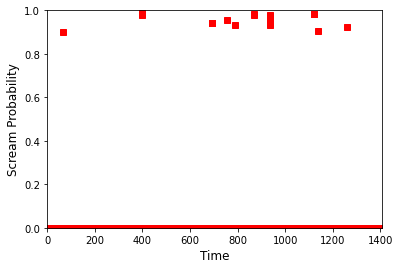

[12] /app/Speech Emotions/786127949_s17400_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


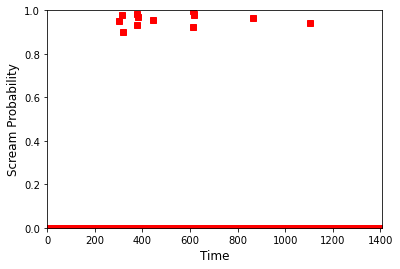

[13] /app/Speech Emotions/780424731_s34980_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


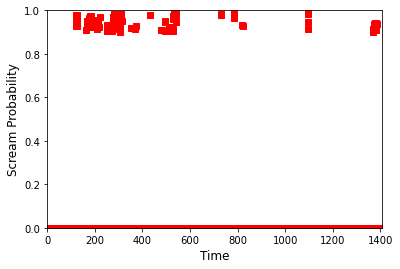

[14] /app/Speech Emotions/780347531_s3810_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


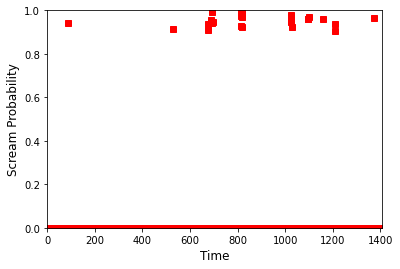

[15] /app/Speech Emotions/774670990_s29910_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


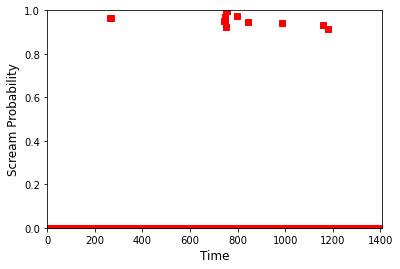

[16] /app/Speech Emotions/769588654_s24000_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


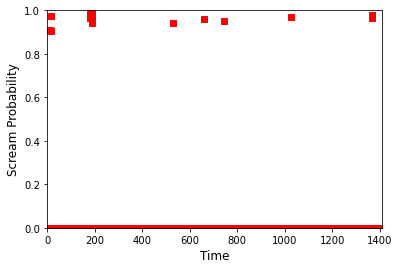

[17] /app/Speech Emotions/769286684_s5100_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


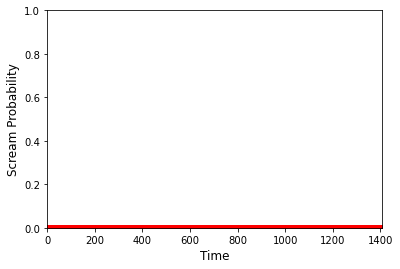

[18] /app/Speech Emotions/763722162_s13290_d60.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


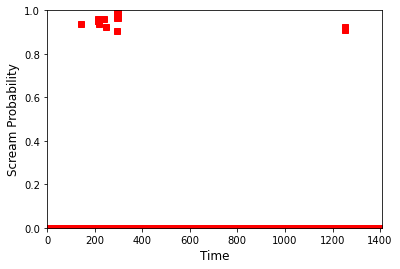

[19] /app/Speech Emotions/721083276_s6819_d30.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


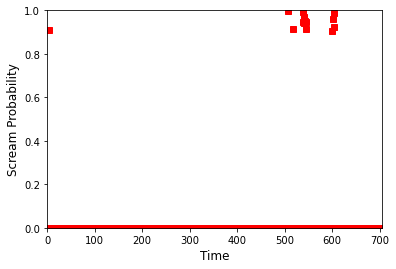

[20] /app/Speech Emotions/717096688_s1470_d30.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


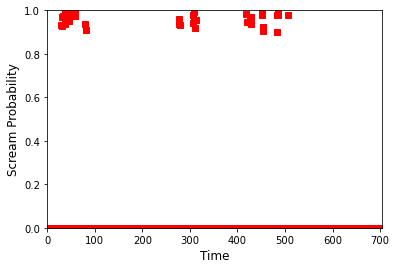

[21] /app/Speech Emotions/716822577_s12074_d30.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


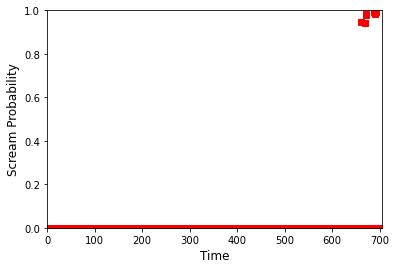

[22] /app/Speech Emotions/716354179_s6944_d30.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


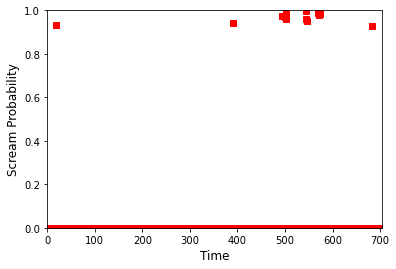

[23] /app/Speech Emotions/715297637_s6078_d30.mp4


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


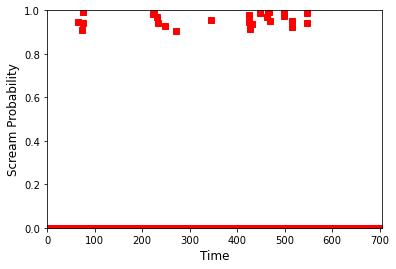

time: 1min 21s


In [191]:
for i, link in enumerate(links, start=1):
    print('[{}] {}'.format(i, link))
    get_scream_prob(link)